# HW2: Linear Regression

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load required modules. Each time you start your server, you will need to execute this cell again to load the modules.

1. If the question asks you write code then write concise code to solve the problem
2. If the questions ask you to make a plot then make simple legible plots with labeled axes
2. If the question asks for your comments then you need to write what you learned from looking at the output of the code, model, or plot

When you finish, save the file with all of the code executed and plots created and reupload to canvas


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/MyDrive/STAT335/

Mounted at /content/drive
/content/drive/MyDrive/STAT335


# Question 1 - House price prediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Then meaning of some selected variables.

* id: a notation for a house
* date: the date house was sold
* price: price of the house
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms/bedrooms
* sqftliving: square footage of the home
* zipcode: zip code
* condition: how good the condition is overall. 1 indicates worn out property and 5 excellent.

In [ ]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

your comments here

** *italicized text*Question 1.1.** How many covariate variables (id and date are not covariate variables)? How many samples?

In [ ]:
covariates = len(dataset.columns) - 3 # Subract Index, Id, date
samples = len(dataset)
print(covariates, samples)

16 21613


There is 18 covariates and there is 21613 samples of data.

**Question 1.2.** Create a new dataframe with the target variable `price` and the following covariates: `bedrooms`, `bathrooms`, `sqft_living`, `zipcode`,`condition`. Convert `price` to be in terms of 1000s of dollars, i.e.  price = price/1000.

In [ ]:
columns = ["price", "bedrooms", "bathrooms", "sqft_living", "zipcode", "condition"] # Choose variables to be in new data frame
new_dataset = dataset[columns]
new_dataset["price"] = new_dataset["price"] / 1000

new_dataset.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition
0,221.9,3,1.00,1180,98178,3
1,538.0,3,2.25,2570,98125,3
2,180.0,2,1.00,770,98028,3
3,604.0,4,3.00,1960,98136,5
4,510.0,3,2.00,1680,98074,3


your comments here


# **Question 1.4.** For each categorical variable, print out the number of categories.

In [ ]:
categorical_vars = ["zipcode", "condition"]
for var in categorical_vars:
    categories = dataset[var].nunique()
    print(f"{var} has {categories} categories.")

zipcode has 70 categories.
condition has 5 categories.




```
# This is formatted as code
```

your comments here

**Question 1.5.** Print a covariance matrix between all variables (including price) and create a pair plot (see linear regression notes). State which variable is most correlated with price and which is least correlated.

In [ ]:
# covariance
cov_matrix = new_dataset.cov()
print(cov_matrix)

                     price    bedrooms   bathrooms    sqft_living  \
price        134782.378397  105.286276  148.481496  236715.431307   
bedrooms        105.286276    0.865015    0.369527     492.596040   
bathrooms       148.481496    0.369527    0.593151     533.811988   
sqft_living  236715.431307  492.596040  533.811988  843533.681368   
zipcode       -1045.071663   -7.597239   -8.400840   -9800.232484   
condition         8.687030    0.017232   -0.062638     -35.114601   

                 zipcode  condition  
price       -1045.071663   8.687030  
bedrooms       -7.597239   0.017232  
bathrooms      -8.400840  -0.062638  
sqft_living -9800.232484 -35.114601  
zipcode      2862.787835   0.105343  
condition       0.105343   0.423467  


The Variable that is most correlated with Price is 'sqft_living' and the variable that is least correlated is 'condition'.

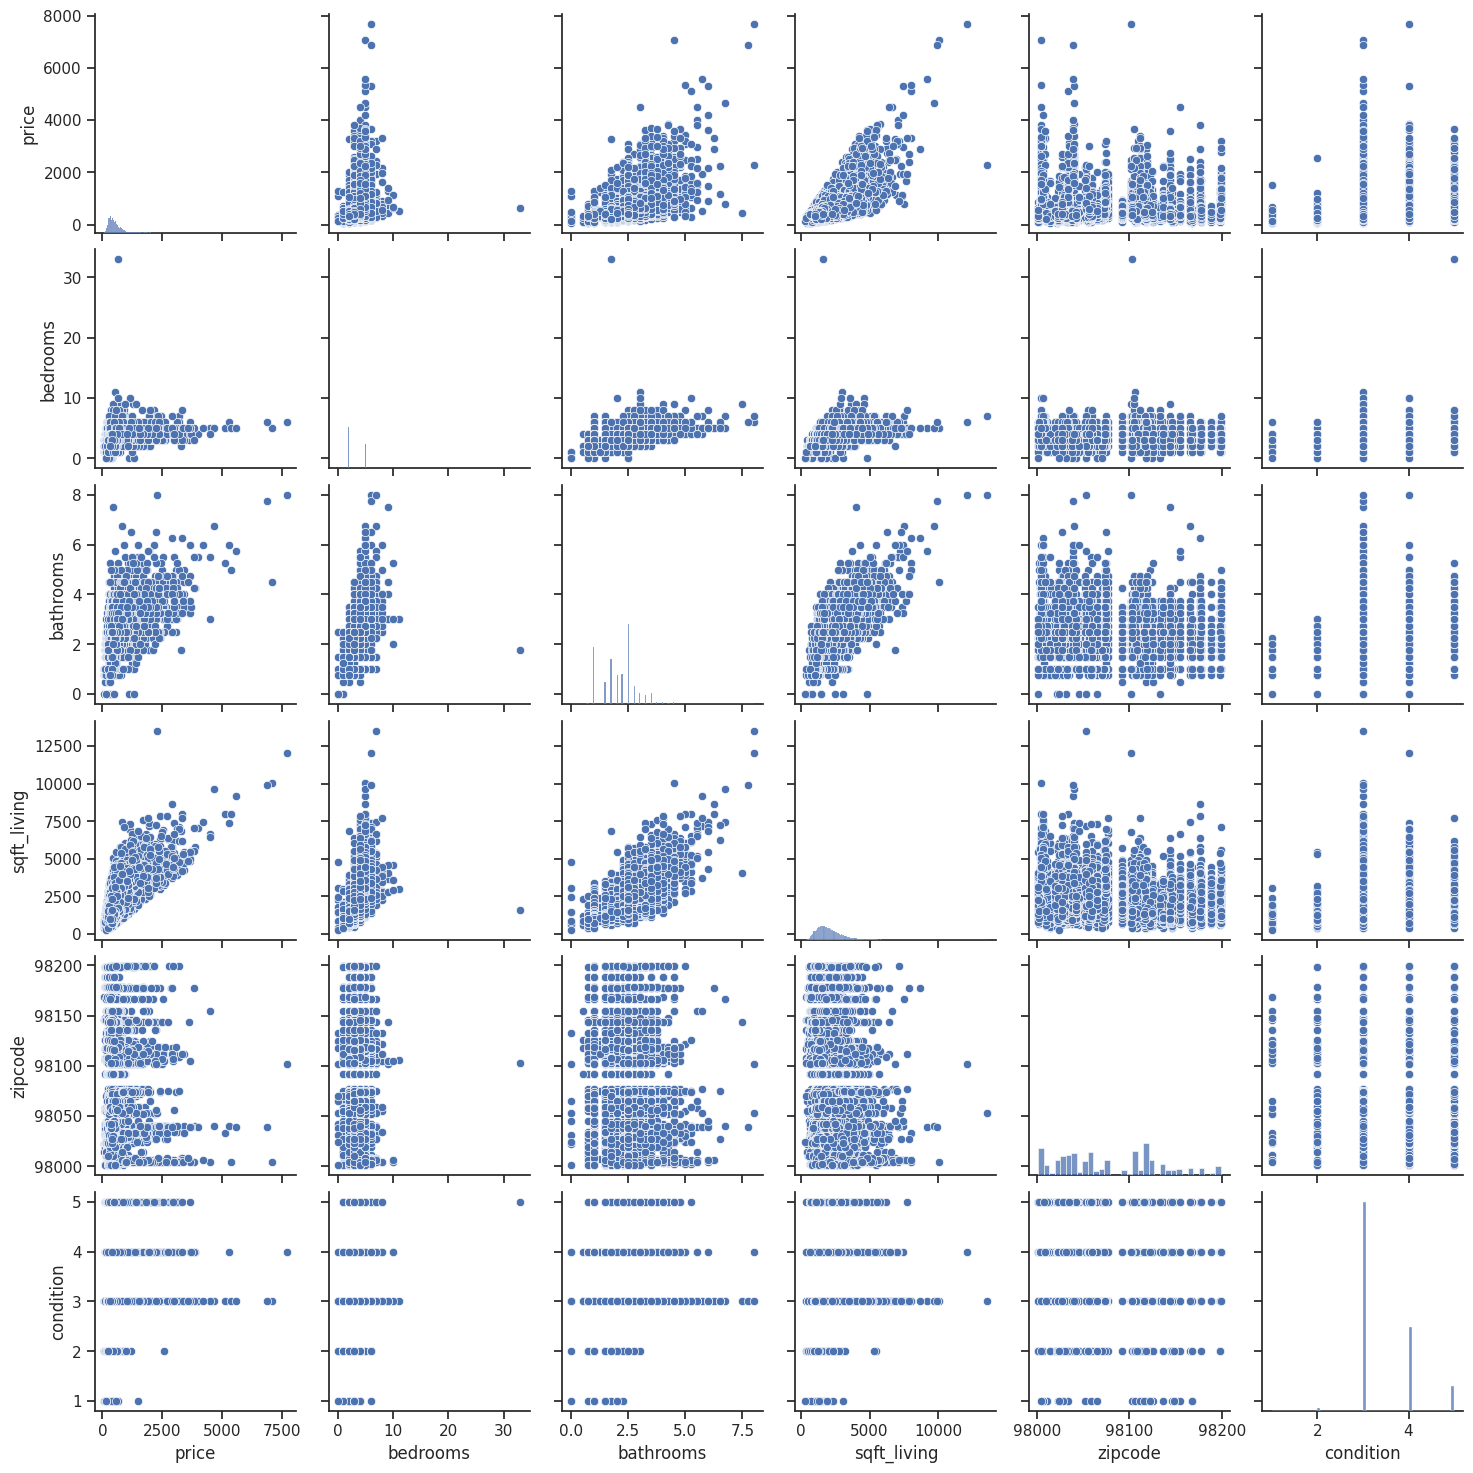

In [ ]:
# pair plot
sns.pairplot(new_dataset)
plt.show()



```
# This is formatted as code
```

The Variable that is most correlated with Price is 'sqft_living' and the variable that is least correlated is 'condition'.

## Part 1. Simple Linear Regression

Predict `price` using the living area size `sqft_living`

**Question 2.1.** Split your data into a training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split

sqft = new_dataset[['sqft_living']]
price = new_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(sqft, price, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 1), (17290,), (4323, 1), (4323,))

your comments here

**Question 2.2.** Use sklearn's `LinearRegression` to obtain the linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

your comments here

**Question 2.3.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
yhat_test = lm.predict(X_test)
mse_test = np.mean((y_test - yhat_test)**2)

yhat_train = lm.predict(X_train)
mse_train = np.mean((y_train - yhat_train)**2)
print("Train")
print('MSE -', mse_train)
print('R2 - ', lm.score(X_train, y_train))
print("\n")
print("Test")
print('MSE -', mse_test)
print('R2 - ', lm.score(X_test, y_test))

Train
MSE - 66319.34778451793
R2 -  0.4923838387582953


Test
MSE - 76484.97706177612
R2 -  0.4940690538908902


I think the model generalized okay but not great. Since the mse is so high for both the train and test data our model clearly has a large amount of error in its predictions. About a 10000 value difference between the two mse with an 80% to 20% train/test split seems like a lot but when you consider the context of how high both mse are and how large of value we are tring to predict (price) its not as big of a difference as it first seems. The r-squared is fairly similar but that does not really tell us much about the generability.

**Question 2.4.** Use statsmodels `ols` method to obtain the linear regression model with an intercept (check linear regression note). Display the summary statistics below. State if `sqft_living` is significant or not.

In [ ]:
X_train_con = sm.add_constant(X_train)
OLS_regression = sm.OLS(y_train, X_train_con)
OLS_fit = OLS_regression.fit()

print(OLS_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:16:57   Log-Likelihood:            -1.2051e+05
No. Observations:               17290   AIC:                         2.410e+05
Df Residuals:                   17288   BIC:                         2.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -41.9992      4.887     -8.594      

'sqft_living' is significant because the p-value is super small (showing as 0) which is less than a = .05. So 'sqft_living' has an impact on price that is significant.

## Part 2. Multiple regression model

**Question 3.1.** Predict `price` with `bedrooms`, `bathrooms`, and `sqft_living` again using sklearns `LinearRegression`

In [ ]:
x_vars = new_dataset[['bedrooms', 'bathrooms', 'sqft_living']]
y2 = new_dataset['price']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_vars, y2, test_size=0.2, random_state=42)

multiple_reg = LinearRegression()
multiple_reg.fit(x_train2, y_train2)

yhat_train2 = multiple_reg.predict(x_train2)
yhat_test2 = multiple_reg.predict(x_test2)

your comments here

**Question 3.2.** Print the training and testing MSE and R^2 metrics. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion. Also state whether this model improved over the simple linear regression.

In [ ]:
mse_train2 = np.mean((y_train2 - yhat_train2)**2)
mse_test2 = np.mean((y_test2 - yhat_test2)**2)
print("Train")
print('MSE -', mse_train2)
print('R2 - ', multiple_reg.score(x_train2, y_train2))
print("\n")
print("Test")
print('MSE -', mse_test2)
print('R2 - ', multiple_reg.score(x_test2, y_test2))

Train
MSE - 64516.689328096094
R2 -  0.5061816005917186


Test
MSE - 74237.63495318287
R2 -  0.5089347172264898


The model is still only generalizing okay and not great. The 10000 value difference between the mse for train and test when doing an 80% to 20% split is not ideal but when you consider the context of how high both of the mse are and look at the ratio of the difference you see its not as big of a difference as it first seems, but we want it to be closer. The model however, is improved from simple linear regresion as we saw about a 2000 value decrease in the mse for both the train and the test and we also saw the r-sqaured value increase by about .01 when we use multiple linear regression so the model is slightly better.

**Question 3.2.** Use statsmodels `ols` to determine which variables are significant (ignoring issues of multiple testing). Display the summary below and state which variables are significant and why.

In [ ]:
x_train2_con = sm.add_constant(x_train2)
OLS_multiple = sm.OLS(y_train2, x_train2)
OLS_fit2 = OLS_multiple.fit()

print(OLS_fit2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          3.155e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                        0.00
Time:                        19:18:51   Log-Likelihood:                     -1.2032e+05
No. Observations:               17290   AIC:                                  2.406e+05
Df Residuals:                   17287   BIC:                                  2.407e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Answer: Based on the summary, all 3 variables in our model (bedrooms, bathrooms, sqft_living) are statistically significant predictors because all of then have p-values that are very small (showing up as 0) which is less than a = .05.

## Part 3. Regress on zip code

**Question 4.1.** Revise your answer of **Question 1.3.**. The zipcode is a nominal variable whose values are represented by numbers. In this section, we want to divide the county into two parts based on zipcode. Create a new column named `area`. If the `zipcode` is no more than 98100, its area = 0; If the `zipcode` is larger than 98100, we let area = 1.  

In [ ]:
area = []

for zip in new_dataset['zipcode']:
    if zip <= 98100:
        area.append(0)
    else:
        area.append(1)

new_dataset['area'] = area

print(new_dataset.head())

   price  bedrooms  bathrooms  sqft_living  zipcode  condition  area
0  221.9         3       1.00         1180    98178          3     1
1  538.0         3       2.25         2570    98125          3     1
2  180.0         2       1.00          770    98028          3     0
3  604.0         4       3.00         1960    98136          5     1
4  510.0         3       2.00         1680    98074          3     0


NOTE: There was no question 1.3 so I assume this is what was meant.

**Question 4.2.** Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
area = new_dataset[['area']]
price = new_dataset['price']

area_train, area_test, price_train, price_test = train_test_split(area, price, test_size=0.2, random_state=42)

area_lm = LinearRegression()
area_lm.fit(area_train, price_train)

price_train_hat = area_lm.predict(area_train)
price_test_hat = area_lm.predict(area_test)

mse_price_train = np.mean((price_train - price_train_hat)**2)
mse_price_test = np.mean((price_test - price_test_hat)**2)
print("Train")
print('MSE -', mse_price_train)
print('R2 - ', area_lm.score(area_train, price_train))
print("\n")
print("Test")
print('MSE -', mse_price_test)
print('R2 - ', area_lm.score(area_test, price_test))

Train
MSE - 130632.32602562722
R2 -  0.0001246681939796046


Test
MSE - 151283.27158582248
R2 -  -0.0007048660297945819


We can see from our super high mse and low r-squared that there is no linear relationship between area and price that would allow us to predict anything. In my opinion the model did not generalize great from training to testing but it was okay. I found a 21000 value difference in the mse from training to testing when using an 80% to 20% split, which is a large value but when we look at how high the mse is for both testing and training we see that the change isn't that massive from a ratio perspective.

**Question 4.3.** We want to refine the area, so we divide the county into four parts based on zipcode. Create a new column named `area2`. area2 = 0 if zipcode <= 98050; area2 = 1 if 98050 < zipcode <=98100; area3 = 2 if 98100 < zipcode <=98150; area2 = 3 if zipcode > 98150.

In [ ]:
area2 = []

for zip in new_dataset['zipcode']:
    if zip <= 98050:
        area2.append(0)
    elif 98050 < zip <= 98100:
        area2.append(1)
    elif 98100 < zip <= 98150:
        area2.append(2)
    else:
        area2.append(3)

new_dataset['area2'] = area2

print(new_dataset.head())


   price  bedrooms  bathrooms  sqft_living  zipcode  condition  area  area2
0  221.9         3       1.00         1180    98178          3     1      3
1  538.0         3       2.25         2570    98125          3     1      2
2  180.0         2       1.00          770    98028          3     0      0
3  604.0         4       3.00         1960    98136          5     1      2
4  510.0         3       2.00         1680    98074          3     0      1


For Question 4.3 we just Predicted price with area so I did it with area2.

**Question 4.3.**  Predict `price` with `area`. Print the training and testing MSE and R2. State whether you believe (your opinion) if the model generalized well from the training to the testing dataset. You must justify your opinion.

In [ ]:
area2 = new_dataset[['area2']]
price = new_dataset['price']

area2_train, area2_test, price_train, price_test = train_test_split(area2, price, test_size=0.2, random_state=42)

area2_lm = LinearRegression()
area2_lm.fit(area2_train, price_train)

price_train_hat = area2_lm.predict(area2_train)
price_test_hat = area2_lm.predict(area2_test)

mse_price_train = np.mean((price_train - price_train_hat)**2)
mse_price_test = np.mean((price_test - price_test_hat)**2)
print("Train")
print('MSE -', mse_price_train)
print('R2 - ', area2_lm.score(area2_train, price_train))
print("\n")
print("Test")
print('MSE -', mse_price_test)
print('R2 - ', area2_lm.score(area2_test, price_test))

Train
MSE - 130501.77855142576
R2 -  0.001123894059850028


Test
MSE - 151097.62437305847
R2 -  0.0005231485896040056


We can see from our super high mse and low r-squared that there is no linear relationship between area2 and price that would allow us to predict anything. In my opinion the model did not generalize great from training to testing but it was okay. I found a 21000 value difference in the mse from training to testing when using an 80% to 20% split, which is a large value but when we look at how high the mse is for both testing and training we see that the change isn't that massive from a ratio perspective.

## Part 4. Build a full model

Lets put our datascience skills to the test.

1. Use the variables in the original dataset (except date and ID) to predict `price/1000`
2. You cannot use price to predict price.
3. Otherwise you can use any variable or interaction that you want. Decide whether variables need to be encoded as categories or treated continuously.

**Question 5.1.** Create training and testing dataset with `test_size=0.33` and `random_state=42`.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

In [ ]:
dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id', 'date'], axis=1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataset = pd.read_csv("kc_house_data.csv")
dataset = dataset.drop(['id', 'date'], axis=1)

# predict price/1000
y = dataset.loc[:,['price']] / 1000

# select continuous features
continuous_features = dataset.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
                       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

# encode categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

enc = OneHotEncoder()
categories = dataset.loc[:,['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]
enc.fit(categories)

encoded_categories = enc.transform(dataset.loc[:,['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]).toarray()


# concatenate all features into a single covariate array x
x = np.hstack([continuous_features, encoded_categories])


# you must use this split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

**Question 5.2.** Using all of the covariates develop a linear model that achieves a test MSE $ < 30000$ and a test R2 > 0.8.

- You will need to go back and forth between **Question 5.1.** and **Question 5.2.** to figure out which features are needed (and which interactions you need to create).

- There are many possible answers here (and it is definitely possible)

- I found `zipcode` very helpful. You will likely need interactions.

Print the test MSE and test R2

In [ ]:
from sklearn.linear_model import LinearRegression

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_test = lm.predict(x_test)
mse_test = np.mean((y_test - yhat_test)**2)

print("Test")
print('MSE -', mse_test)
print('R2 - ', lm.score(x_test, y_test))

Test
MSE - 27228.14452125037
R2 -  0.818153377424596


My model has an mse less than 30000 and an R^2 greater than .8 without using any interactions so I didn't add any out of model simplicity. The only thing I could think of that I did wrong is created a categorical variables that should not have been but everything I chose is a categorical variable and everything I didn't choose is a continous feature.

**Question 5.3.** Describe the model you built and use statsmodels to determine which variables were the most important for your model

In [ ]:
import statsmodels.api as sm

x_train2 = sm.add_constant(x_train)

ols = sm.OLS(y_train, x_train2).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:21:56   Log-Likelihood:                -92082.
No. Observations:               14480   AIC:                         1.847e+05
Df Residuals:                   14198   BIC:                         1.869e+05
Df Model:                         281                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.82e+04   3409.166     -5.339      0.0

your comments here

# Question 2 - Consistency of beta

Now, we will investigate some statistical properties of linear regression. We will show that
1. Parameter estimates tend to improve with more data
2. A linear model is unbiased when the data is truly linear
3. Variance decreases with increasing sample size

Unlike in question 1, where data is provided, this question will involve simulating our own data. We do this so that we can check statistical properties through repeated simulation. Our interest is in uncovering properties of the linear model that hold up across many different datasets.




In [ ]:
from sklearn.linear_model import LinearRegression

## Part 1. Consistency of the betas

Suppose we observe (or generate) some data that is truly a linear combination of $p$ features. That is $y$ is in actuality generated by an (unknown) linear combination of $x_1$, $x_2$, ..., $x_p$ plus error. We can write any observation $y_i$ as
$$
y_i = x_{i, 1} \beta_1 + x_{i, 2} \beta_2 + ... x_{i, p} \beta_p + \epsilon
$$
where $x_{i, 1}$ means the $i$th observation of variable $x_1$,  $x_{i, 2}$ means the $i$th observation of variable $x_2$, and so on and so forth. If $Y = [y_1,...,y_n]$ is a column of $n$ targets, $X$ is data matrix with $n$ rows and $p$ columns, $\beta = [\beta_1,...,\beta_p]$ is our coefficient vector, then we can write this in shorthand as
$$
Y = X \beta + \epsilon
$$
to represent the above equation applied to every observation in $i = 1,2,...,n$.
 - _Note that $X \beta$ can be computed in python as_ `x @ beta`.

Suppose we fit a linear model to data that is truly generated by a linear combination of the features and estimate our coefficient matrix $\hat \beta$. A natural question to ask is how accurate is $\hat \beta$? I.e. does $\hat \beta$ approximate $\beta$ well? We will use simulation to show that this is the case.




1. Run the following code to generate __one__ example dataset. This is simply for you to see what the data are supposed to look like.

2. Write a loop that does the following 1000 times
  - Generates an (x, y) pair like the example code (use $n = 100$)
  - Fits a linear model from x to y
  - saves the estimated beta vector from the linear model

3. Save all of your estimated betas in a `(1000, 4)` array called `beta_hat`

4. Plot individual histogram of each estimated beta (i.e. a histogram of each column). Include a black vertical line at the true value of beta. Do the histograms roughly center at the vertical line?

5. Repeat steps 2-4 with $n = 2000$. Compare the histograms of the estimated betas when $n = 2000$ vs when $n=100$. What do you notice about the spread of the estimated betas when the sample size is much higher?

In [ ]:
# these are the actual beta values that are used to generate the data
# we will compare our estimated values to these
true_beta = np.array([1, 2, -1, 0])

# number of features
p = true_beta.shape[0]

# sample size
n = 100

# generate "data" from a standard normal with n rows and p columns
x = np.random.normal(0, 1, [n, p])
y = x @ true_beta + np.random.normal(0, 1, [n])


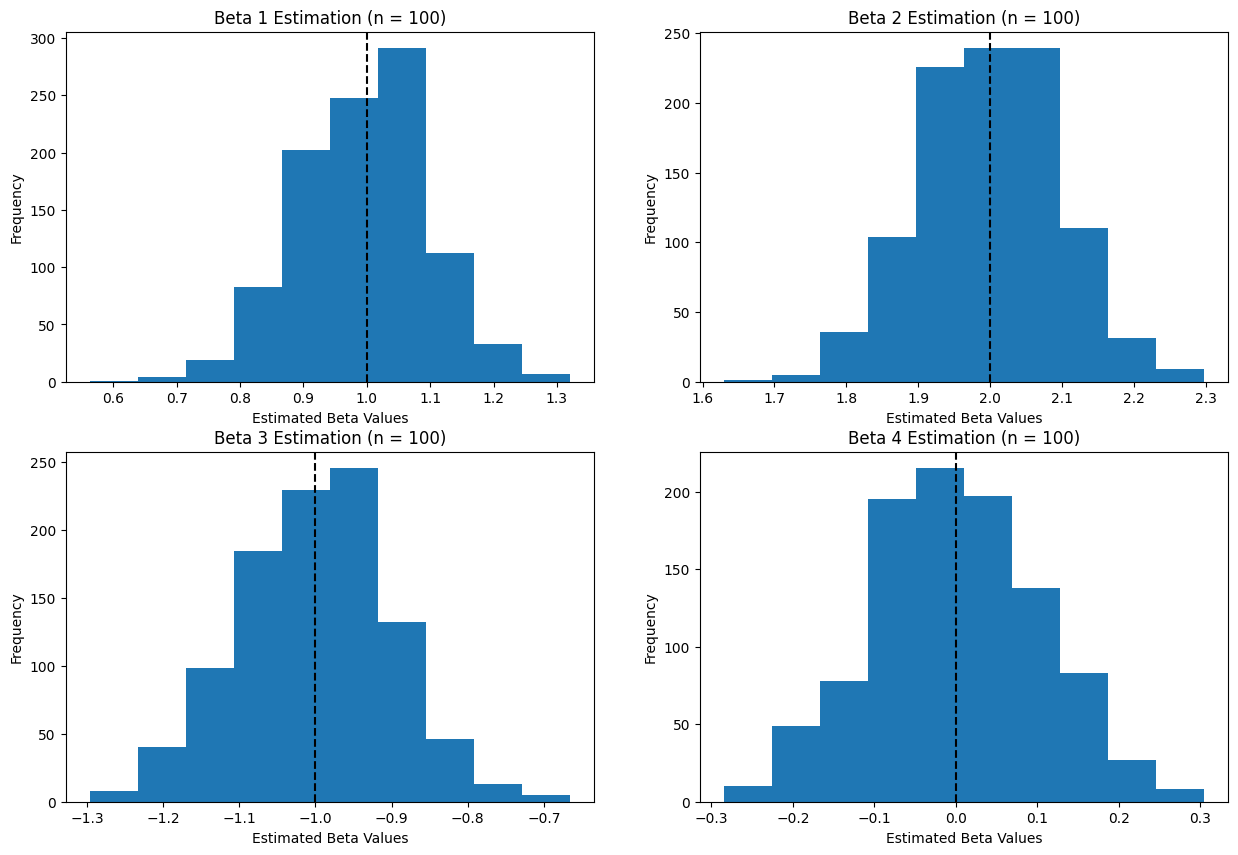

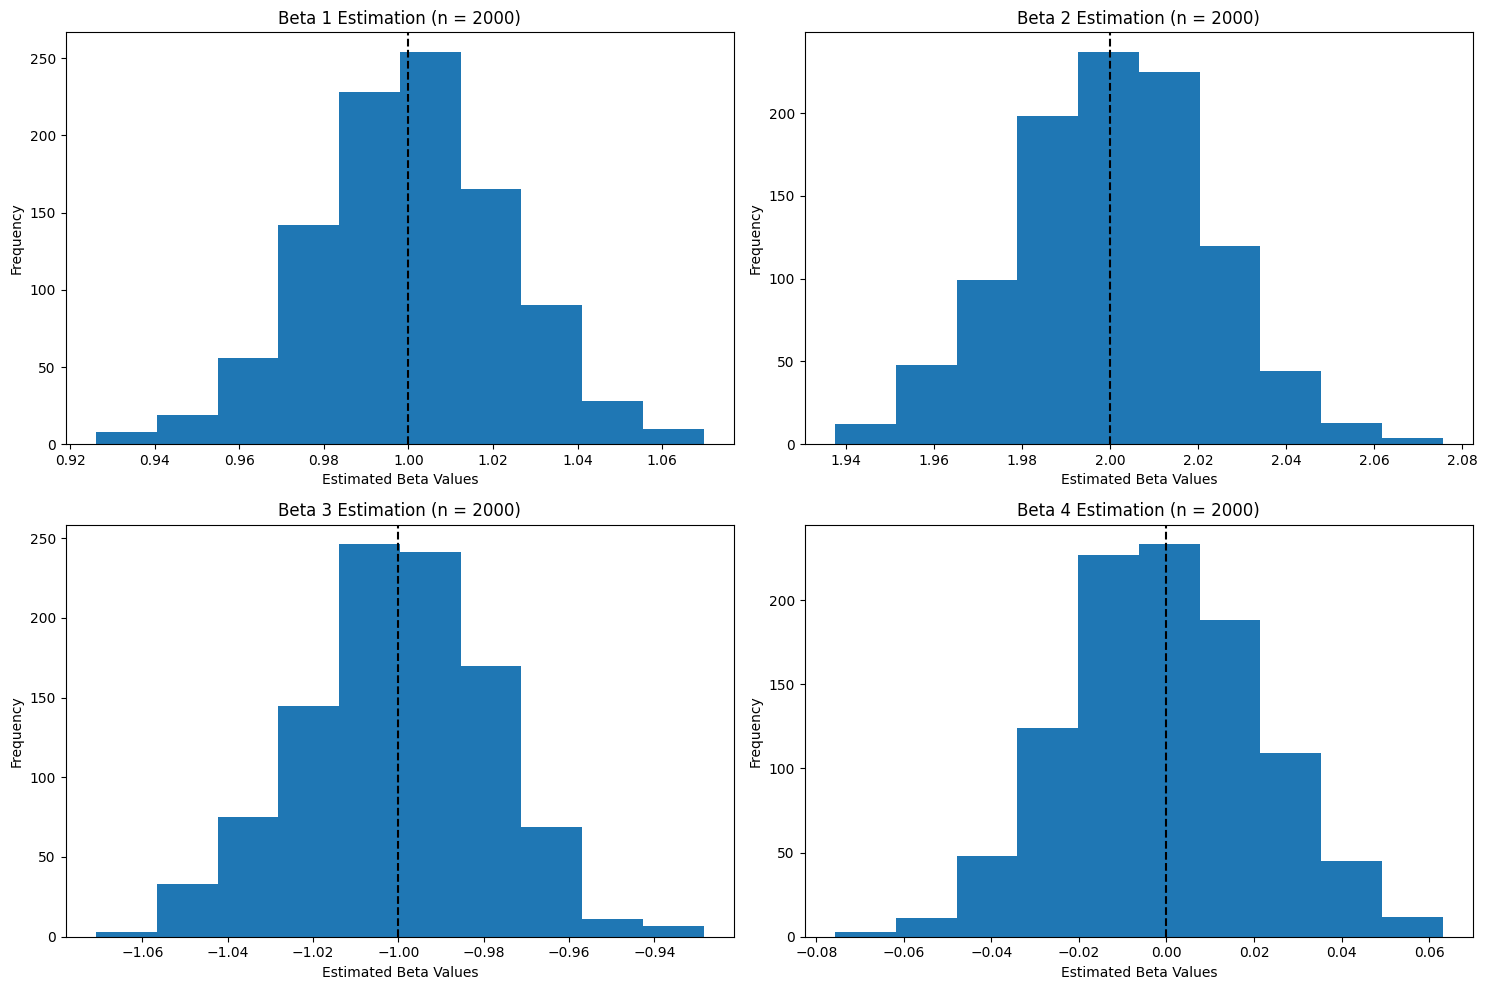

In [ ]:
sims = 1000
n1 = 100
n2 = 2000
beta_hat = np.zeros((sims, p))
beta_hat2 = np.zeros((sims, p))

# For n = 100
for i in range(sims):
    x = np.random.normal(0, 1, [n1, p])
    y = x @ true_beta + np.random.normal(0, 1, [n1])
    beta_hat[i, :] = np.linalg.lstsq(x, y, rcond=None)[0]

plt.figure(figsize=(15, 10))

for j in range(p):
    plt.subplot(2, 2, j + 1)
    plt.hist(beta_hat[:, j], label=f'n={n1}')
    plt.axvline(true_beta[j], color='black', linestyle='dashed')
    plt.title(f'Beta {j+1} Estimation (n = 100)')
    plt.xlabel('Estimated Beta Values')
    plt.ylabel('Frequency')

# For n = 2000
for i in range(sims):
    x = np.random.normal(0, 1, [n2, p])
    y = x @ true_beta + np.random.normal(0, 1, [n2])
    beta_hat2[i, :] = np.linalg.lstsq(x, y, rcond=None)[0]

plt.figure(figsize=(15, 10))

for j in range(p):
    plt.subplot(2, 2, j + 1)
    plt.hist(beta_hat2[:, j], label=f'n={n2}')
    plt.axvline(true_beta[j], color='black', linestyle='dashed')
    plt.title(f'Beta {j+1} Estimation (n = 2000)')
    plt.xlabel('Estimated Beta Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


ANSWER: When we make the sample size 2000 instead of 100 the spread of all of the estimated betas becomes much tighter around the true beta value.

## Part 2. Mean and variance of the parameters

1. Print the mean estimated beta from each simulation study. How closely do these match the true beta vector we generated the data with?

2. Print the variance of the estimated betas from each simluation study. Is the variance increasing or decreasing with sample size?

In [ ]:
# mean
mean_beta1 = np.mean(beta_hat, axis=0)
mean_beta2 = np.mean(beta_hat2, axis=0)
print("Mean of Estimated Beta for (n=100)", mean_beta1)
print("Mean of Estimated Beta for n=2000", mean_beta2)


Mean of Estimated Beta for (n=100) [ 9.94216155e-01  1.99715832e+00 -9.99775981e-01 -2.52768573e-04]
Mean of Estimated Beta for n=2000 [ 1.00036280e+00  2.00065041e+00 -1.00007011e+00 -5.19040048e-04]


The mean of the estimated betas for n = 100 sample size, are not close to the mean of the true beta's except for the 2nd beta and the 4th beta is pretty close to 0. The means of the estimated betas for the simulation with n = 2000 sample size, is almost exactly the same as the true beta vector for all 4 betas.

In [ ]:
# variance
variance_beta1 = np.var(beta_hat, axis=0)
variance_beta2 = np.var(beta_hat2, axis=0)
print("Variance of Estimated Beta for (n=100)", variance_beta1)
print("Variance of Estimated Beta for n=2000", variance_beta2)

Variance of Estimated Beta for (n=100) [0.01084291 0.00940567 0.00997859 0.010864  ]
Variance of Estimated Beta for n=2000 [0.00052393 0.00049019 0.00048507 0.00048958]


As the sample size increases the variance is decreasing in the beta estimates.

# Question 3 - Multicollinearity

In the above problem, we generated all our features _independently_. That is $x_1$ has no influence on $x_2$, $x_2$ has no influence on $x_3, etc. When this _assumption_ holds we saw that the betas were estimated really well!

What happens if the features are not independent?

__Multicollinearity__ is a situation where one predictor can be written as a linear combination of the other predictors. For example, if $x_2 = 0.5 x_1$ then we would say that $x_1$ and $x_2$ are collinear. If $x_3 = x_1 + x_2$ then
$x_1$, $x_2$, and $x_3$ are all collinear with each other. In general, we can see that there is some redundant information being included in the model. If $x_3 = x_1 + x_2$, then $x_3$ isnt providing any information over what $x_1$ and $x_2$ already tell us.

Is this redundancy harmless? No.

Multicollinearity can be a big issue for _training_ models and _interpreting_ their coefficients. Lets see why.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1. Gererate simulation data

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.


2. Stack these variables into a single data matrix `x` (should have 1000 rows and 3 columns).

3. Compute `y = x @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

4. Create a `1x3` array of scatter plots showing `y` vs each covariate.


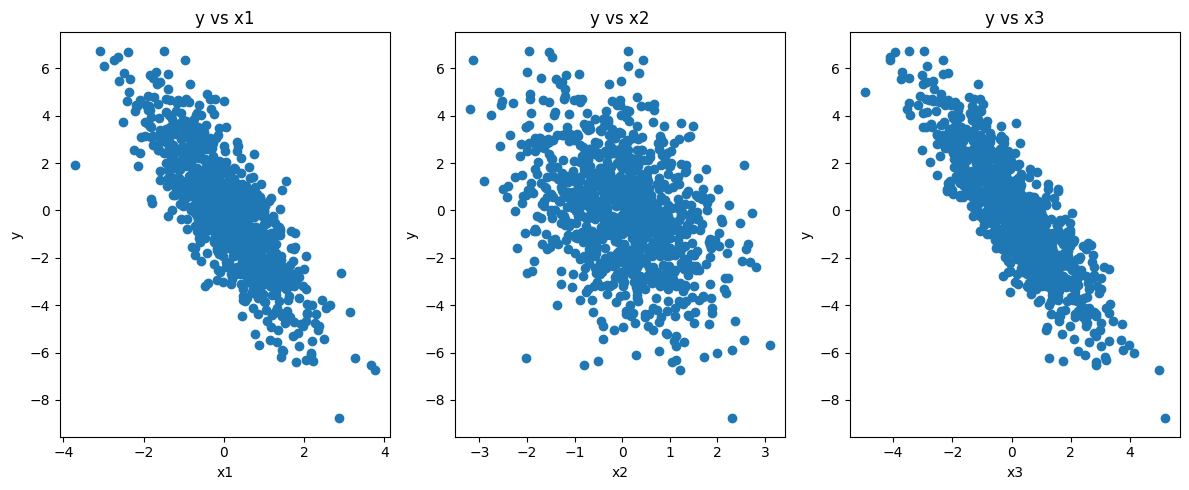

In [ ]:
np.random.seed(99)
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2
x = np.column_stack((x1, x2, x3))
beta = np.array([1, 2, -3])

y = x @ beta + np.random.normal(0, 1, n)

# Create scatter plots
plt.figure(figsize=(12, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, i], y)
    plt.xlabel(f'x{i+1}')
    plt.ylabel('y')
    plt.title(f'y vs x{i+1}')

plt.tight_layout()
plt.show()


There was no provided beta vector?

## Part 2. Check Linear model fit

1. Split the data into training and testing sets. Use a test size of 0.33 and a random state of 42.

2. Fit a linear regression on the training data

3. Print the coefficients and the MSE on the testing data
  - if the coefficients are close to infinity re-generate the data until you have finite numbers
  - should be between 0 and 2

4. Comment: Are these estimated coefficients close to the true coefficients?

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(x_train, y_train)

yhat_test = lm.predict(x_test)
mse_test = np.mean((y_test - yhat_test) ** 2)

print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)
print("MSE Testing Data:", mse_test)


Intercept: 0.05338324185551476
Coefficients: [ 4.1550486e+13  4.1550486e+13 -4.1550486e+13]
MSE Testing Data: 1.0546672795051002


The estimated coefficients are not close to the true coefficients because of the multicollinearity.

## Part 3. Compare with reduced model

1. Create a new data matrix `x_reduced` that consists of only `x1` and `x2`.

2. Compute `y_reduced = x_reduced @ beta + np.random.normal(0, 1 n)` to generate the response with the provided beta vector

3. Split the data into training and testing datasets again using a test size of 0.33 and a random state of 42

4. Fit a linear model, print the coefficients and the test MSE

5. Comment: Are these model coefficients different from before? How does the test MSE compare to the previous model? Summarize the impact of multicollinearity on this model in terms of coefficient estimation and prediction error.

In [ ]:
x_reduced = x[:, :2]
beta = beta[:2]
y_reduced = x_reduced @ beta + np.random.normal(0, 1, n)

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    x_reduced, y_reduced, test_size=0.33, random_state=42
)

lm_reduced = LinearRegression()
lm_reduced.fit(x_train_reduced, y_train_reduced)

yhat_test_reduced = lm_reduced.predict(x_test_reduced)

mse_test_reduced = np.mean((y_test_reduced - yhat_test_reduced) ** 2)

print("Intercept:", lm_reduced.intercept_)
print("Coefficients:", lm_reduced.coef_)
print("MSE Testing Data:", mse_test_reduced)


Intercept: -0.03360742757748342
Coefficients: [1.01655802 2.01525783]
MSE Testing Data: 0.993902931296478


The model coefficients are much different than before and they are pretty close to the true coefficients. The test MSE is also slightly lower than the previous model. Multicollinearity in the model is causing the impact of the first two variables to be double counted with the third variables, which is leading to inflated coefficents estimates where they are super high and it creates a decently low prediction error but this is miseading.

## Part 4. Checking for multicollinearity

How can we check if multicollinearity is occuring? We can see that in some sense multicollinearity may not matter, but in others it matters a great deal! There are many methods that have been developed to test for multicollinearity in a dataset. We will use the simplest approach which is a simple eyeball test.

1. Generate `n=1000` realizations of three variables `x1`, `x2`, and `x3` where
 - `x1` $\sim$ N(0, 1)
 - `x2` $\sim$ N(0, 1)
 - `x3 = x1 + x2`

 So that `x3` is perfectlly collinear with `x1` and `x2`.

2. Create a 1x3 panel of plots showing each covariate plotted against the others. Comment: What do you notice about these plots? What do they show us about the correlation between variables?

3. Print the correlation coefficient for each variable combination. Which variables are highly correlated?


_Note: more sophiticated approaches involve inspecting variance inflation factors_ https://online.stat.psu.edu/stat462/node/180/

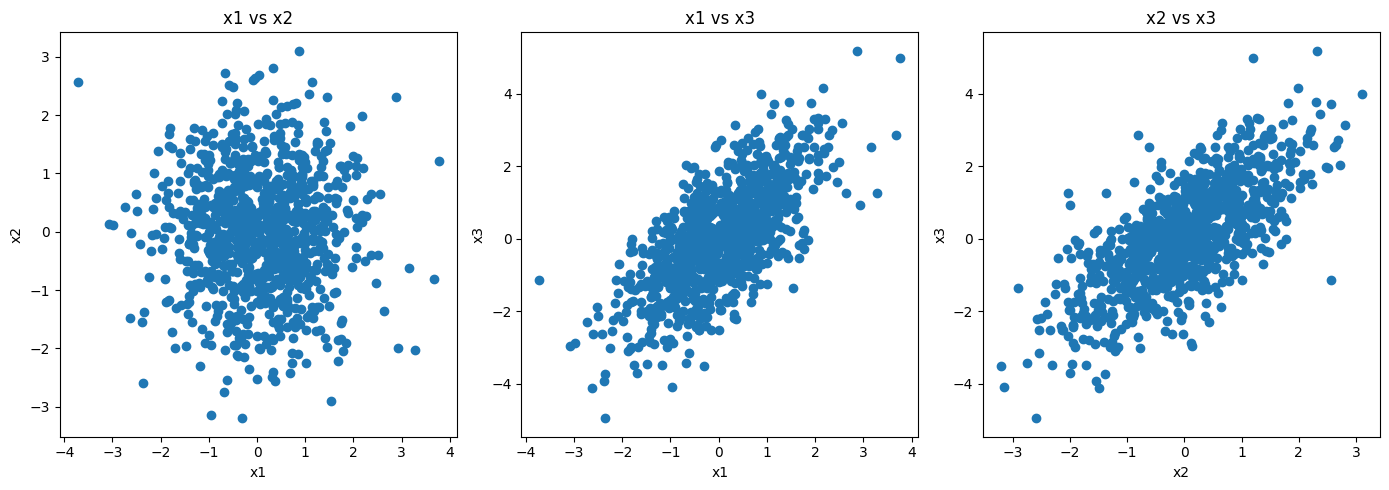

Correlation coefficient for x1 and x2: -0.0071456084347209115
Correlation coefficient for x1 and x3: 0.6980038624048732
Correlation coefficient for x2 and x3: 0.711088049578399


In [ ]:
np.random.seed(99)
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = x1 + x2


plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')

plt.subplot(1, 3, 2)
plt.scatter(x1, x3)
plt.xlabel('x1')
plt.ylabel('x3')
plt.title('x1 vs x3')

plt.subplot(1, 3, 3)
plt.scatter(x2, x3)
plt.xlabel('x2')
plt.ylabel('x3')
plt.title('x2 vs x3')

plt.tight_layout()
plt.show()

corr_x1x2 = np.corrcoef(x1, x2)[0, 1]
corr_x1x3 = np.corrcoef(x1, x3)[0, 1]
corr_x2x3 = np.corrcoef(x2, x3)[0, 1]

# Print the correlation coefficients
print("Correlation coefficient for x1 and x2:", corr_x1x2)
print("Correlation coefficient for x1 and x3:", corr_x1x3)
print("Correlation coefficient for x2 and x3:", corr_x2x3)

From the plots we can see that x1 and x2 don't really show any correlation and are randomly scattered but we see that x1 with x3 and x2 with x3 both show a pattern of a positive linear relationship meaning they have correlation. The coefficients confirm that x1 is highly correlated with x3 and x2 is highly correlated with x3.

# Question 4 - High Dimensional regression

In question 3, we saw how linear regression can go wrong if there is severe collinearity between variables.

Many regression problems assume that the number of predictors $p$ is smaller than the number of samples $n$. What happens if $p > n$?

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

## Part 1. Generate simulation data

1. Generate `n = 100` samples from `p = 200` independent standard normals (hint: you can do this with a single call to `np.random.normal()`) to get an $n \times p$ data matrixd called `x`.

2. Compute the response `y` with the provided beta vector `beta` as `y = x @ beta + np.random.normal(0, 1, n)`

3. Fit a linear regession and plot a histogram of the coefficients. Comment: Do these coefficients center around the true `beta`s (all 1s)?

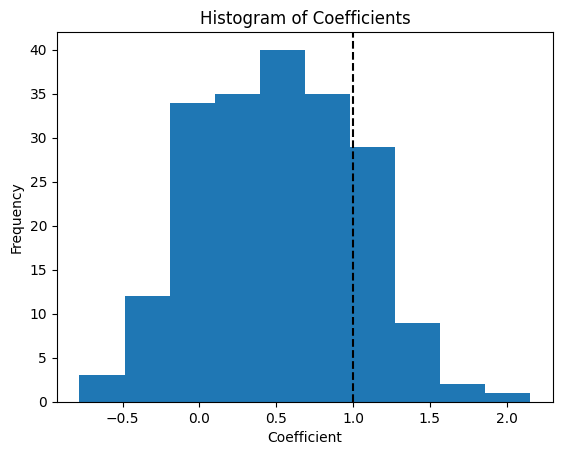

In [ ]:
n = 100
p = 200

x = np.random.normal(0, 1, size=(n, p))

beta = np.ones(p)
y = x @ beta + np.random.normal(0, 1, n)

lm = LinearRegression()
lm.fit(x, y)
coefficients = lm.coef_

plt.hist(coefficients)
plt.axvline(x=1, linestyle='--', color = "black")
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients')
plt.show()

No the coefficients do not center around 1 they center more around .5.

## Part 2. Repeat with even higher dimensional data

Repeat the above with `p = 1000` now. Plot the estimated beta distribution (histogram) from the first model (where `p = 200`) against the new beta distribution (histogram). Overlay these two histograms on top of each other. Comment: What is the difference in the two distributions?

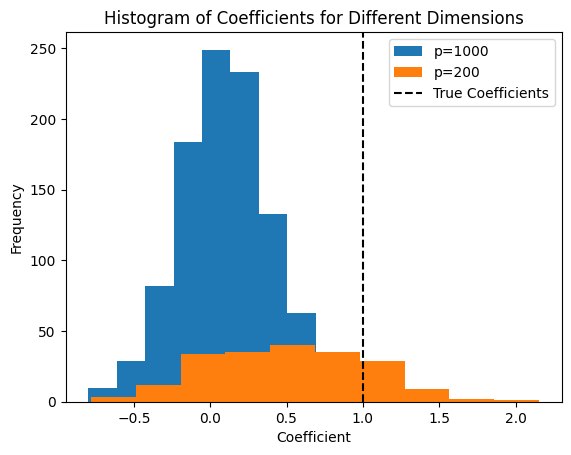

In [ ]:
p2 = 1000

x2 = np.random.normal(0, 1, size=(n, p2))
beta2 = np.ones(p2)
y2 = x2 @ beta2 + np.random.normal(0, 1, n)

lm2 = LinearRegression()
lm2.fit(x2, y2)
coefficients2 = lm2.coef_

plt.hist(coefficients2, label='p=1000')
plt.hist(coefficients, label='p=200')
plt.axvline(x=1, linestyle='--', color='black', label='True Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients for Different Dimensions')
plt.legend()
plt.show()

The main difference bewtween the distributions is that when we set p = 1000 the coefficients distribution gets closer to centering around 0 with higher frequency of events, while when we set p = 200 the coefficients distribution centers more around .5.

## Part 3. Apply Lasso

In class we mentioned that regularized regression models like Ridge and Lasso can improve estimation when $p > n$.

1. Comment: Why will Lasso probably not help here?

2. Rerun the above model (with `p = 1000`) using Lasso instead of LinearRegression anyways. Plot the estimated coefficient distribution and compare with the LinearRegression model. You must choose your own regularization parameter.


ANSWER TO 1.: Lasso probably will not help here because the true beta's for the model we want to build is all ones, but for lasso regression all of the coefficients are shrunk towards 0 and a lot become exactly zero whixh isn't what we are looking for with this model.

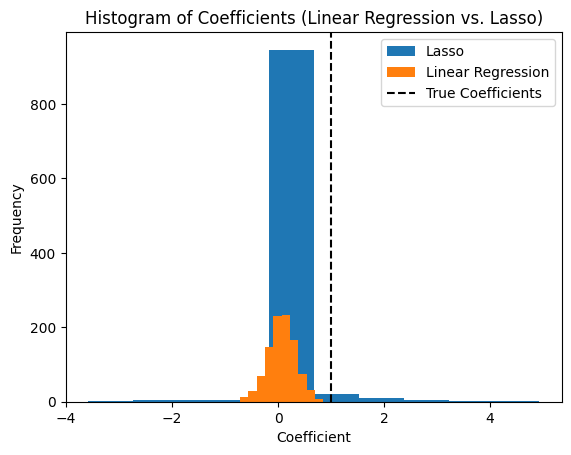

In [ ]:
from sklearn.linear_model import Lasso
n = 100
p = 1000

x = np.random.normal(0, 1, size=(n, p))

beta = np.ones(p)
y = x @ beta + np.random.normal(0, 1, n)

lm = LinearRegression()
lm.fit(x, y)
coefficients = lm.coef_

lm_lasso = Lasso(alpha= 1)
lm_lasso.fit(x, y)
lasso_coefficients = lm_lasso.coef_


plt.hist(lasso_coefficients, label='Lasso')
plt.hist(coefficients, label='Linear Regression')
plt.axvline(x=1, linestyle='--', color='black', label='True Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients (Linear Regression vs. Lasso)')
plt.legend()
plt.show()

Comparing the distribution of the coefficients when we use Lasso to Linear Regression we see that Lasso has a lot of coefficients concentrated around 0, but it also has some that are further spread.

## Part 4. Sparse regression

Lets look at situation where Lasso can help and compare against linear regression. We will generate a sparse coefficient vector, that is a `beta` vector where most of the entries are 0. In situations like this, Lasso and Ridge can help identify variables that have a coefficient of 0 (i.e. they are unimportant).

1. Generate a random "data matrix" drawn from a standard normal, which has $n = 100$ rows and $p = 1000$ columns.

2. Use the provided sparse `beta` vector to compute `y` from `x`.

3. Fit Lasso with a regularization parameter between $0.5$ and $1.5$. Which coefficients were identified as 0 and none 0? Are the correct coefficients identified? How does this change as you increase or decrease the penalization parameter?

In [ ]:
beta = np.concatenate([np.ones(5), np.zeros(p-5)])

In [ ]:
np.random.seed(99)
n = 100
p = 1000
x = np.random.normal(0, 1, size=(n, p))
beta = np.concatenate([np.ones(5), np.zeros(p-5)])

y = x @ beta + np.random.normal(0, 1, n)

lm_lasso = Lasso(alpha=1.5)
lm_lasso.fit(x, y)
lm_lasso.coef_

array([ 0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0

With the penalization set at .5 all of the coefficients were identified as 0 except for the first five and then one more "random" coefficient in the middle. The first 5 coefficients were the ones that are not 0 so the correct coefficents that were non-zero were identified except for that random outlier in the middle. As I increased the penalization parameter the amount of coefficients that were identified as 0 increasd and when I set it to 1.5, all of the coefficients were identified as 0, so as I penalized more the Lasso makes more coefficients 0.

# Question 5 - Optimize your own model

So far we have used sklearn to fit models for us. Let make sure we have some idea of what its doing. We will write our own model and loss functions then use scipys optimization procedures to find the optimal model.

We will demonstrate this on the diabetes dataset, which has been imported below.




In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

diabetes = datasets.load_diabetes(as_frame=True)
x, y = diabetes.data, diabetes.target
y -= np.mean(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Part 1. Check sklearn's solution

1. Fit a linear regression model using sklean to the training data
2. Compute and print the train and test MSEs
3. Print the estimated beta coefficients
4. Comment: Does this model do a good job extrapolating from train to test?

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

train_mse = np.mean((y_train - yhat_train) ** 2)
test_mse = np.mean((y_test - yhat_test) ** 2)

beta_estimates = lm.coef_

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Estimated beta coefficients:", beta_estimates)


Train MSE: 2949.291573722149
Test MSE: 2817.808297221584
Estimated beta coefficients: [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]


This model appears to do a good job of extrapolating from train to test as we see the MSE for train and test are pretty close to eath other.

## Part 2. Write a model function

If `beta` is a length `p` vector and `x` is an `n x p` matrix, then we can compute `yhat = x @ beta` to estimate `y`.

1. Write a function called `model` that takes a data matrix `x` and a parameter vector `beta` and returns `yhat`.
2. Check that it works by feeding it `xtest` and the beta coefficients sklean estimated. Check that the predictions of your function match those of `lm.predict()`

In [ ]:
def model(x, beta):
  yhat = x @ beta
  return yhat

In [ ]:
# testing the function
yhat_function = model(x_test, beta_estimates)
yhat_function
yhat_function_sorted = np.sort(yhat_function, kind='heapsort')
yhat_function_sorted

array([-104.31698198, -103.25586952,  -99.52405454,  -98.92777915,
        -94.88160387,  -93.91807763,  -91.68145527,  -90.93010911,
        -90.43004931,  -89.36800596,  -88.08248043,  -86.82509686,
        -85.02130914,  -84.69395425,  -83.4777622 ,  -83.28600807,
        -79.20138721,  -75.07672721,  -73.64723999,  -73.24391252,
        -69.36266144,  -68.83212085,  -68.75627882,  -62.67833233,
        -61.18710832,  -60.72596088,  -60.31790861,  -59.8199986 ,
        -59.62460987,  -54.76649263,  -54.5387217 ,  -54.49730579,
        -53.0399798 ,  -51.79730044,  -46.8763409 ,  -45.33911792,
        -44.50082562,  -44.32615695,  -43.68973832,  -42.34562971,
        -42.07360102,  -41.76876935,  -41.40346197,  -41.15246013,
        -40.5259645 ,  -39.49439688,  -39.45692274,  -39.3091484 ,
        -37.7224213 ,  -37.30942468,  -34.921255  ,  -30.41609195,
        -29.69154667,  -27.78487635,  -27.050577  ,  -25.33954295,
        -23.59795364,  -23.37234753,  -22.75333889,  -22.75264

In [ ]:
yhattest_sorted = np.sort(yhat_test, kind='heapsort')
yhattest_sorted

array([-106.01645391, -104.95534146, -101.22352647, -100.62725108,
        -96.5810758 ,  -95.61754957,  -93.3809272 ,  -92.62958104,
        -92.12952124,  -91.06747789,  -89.78195236,  -88.52456879,
        -86.72078107,  -86.39342618,  -85.17723413,  -84.98548   ,
        -80.90085914,  -76.77619914,  -75.34671192,  -74.94338445,
        -71.06213337,  -70.53159278,  -70.45575075,  -64.37780427,
        -62.88658025,  -62.42543281,  -62.01738055,  -61.51947053,
        -61.3240818 ,  -56.46596456,  -56.23819363,  -56.19677772,
        -54.73945173,  -53.49677237,  -48.57581283,  -47.03858985,
        -46.20029755,  -46.02562888,  -45.38921025,  -44.04510164,
        -43.77307295,  -43.46824129,  -43.1029339 ,  -42.85193206,
        -42.22543643,  -41.19386881,  -41.15639467,  -41.00862033,
        -39.42189323,  -39.00889661,  -36.62072693,  -32.11556388,
        -31.3910186 ,  -29.48434828,  -28.75004893,  -27.03901488,
        -25.29742557,  -25.07181946,  -24.45281082,  -24.45211

The predictions don't match exactly but they are very close and it looks like it is working properly.

## Part 3. Write a loss function

1. Write a loss function called `mse_loss()` that takes as input a coefficient vector `beta`, a matrix of covariates `x`, and a vector of targets `y` and computes the mean squared error of a linear model with coefficients `beta`.

2. Check that your function works by feeding it `xtest`, `ytest`, and sklearns estimated `beta` vector and checking that it matches the test MSE you computed above.

In [ ]:
def mse_loss(beta, x, y):
    yhat = x @ beta
    mse = np.mean((y - yhat) ** 2)
    return mse

In [ ]:
# test function
testing_mse = mse_loss(beta_estimates, x_test, y_test)
print("Function mse:", testing_mse)
print("First Test mse:", test_mse)

Function mse: 2803.209015195156
First Test mse: 2817.808297221584


It doesn't match exactly becasue using x @ beta is not perfectly matching lm.predict() but they are very very close to matching so no model optimization is lost.

## Part 4. Optimize

Use scipy's optimize function (imported below) to estimate the optimal beta parameters.

1. First generate an initial guess called `beta0`.
2. Use optimize to find the beta vector that minimizes `mse_loss`. Save this result as `beta_hat`
3. print `beta_hat` and compare them with the `beta` vector estimated by sklearn. Also compute the train and test MSE.
4. Comment: Is the beta vector you estimated the close to one estimated by sklearn?

In [ ]:
from scipy.optimize import minimize

In [ ]:
beta0 = beta_estimates
beta_hat = minimize(mse_loss, beta0, args = (x_train, y_train)).x

In [ ]:
print("Scipy Beta",beta_hat)
print("Sklearn Beta",beta_estimates)

Scipy Beta [  31.6039437  -243.06816091  558.54678493  407.78255041 -724.04501946
  400.94602553   11.7815306   172.85015267  629.03961989  -22.82317592]
Sklearn Beta [  32.14928032 -242.82449076  559.98996952  407.63766881 -718.69857577
  396.63703933   10.432395    171.81955335  627.07993787  -21.62312454]


In [ ]:
train_mse = mse_loss(beta_hat, x_train, y_train)
test_mse = mse_loss(beta_hat, x_test, y_test)
print("Train mse:", train_mse)
print("Test mse:", test_mse)

Train mse: 2952.1692869763747
Test mse: 2803.9149882802412


I noticed that no matter what I made the beta0 the beta_hat values were always close to the same.

The beta vector estimated with scipy's optimize function was pretty close to the one estimated by sklearn with some small unit changes between the two with a 6 unit difference being the biggest. Overall very close to the same estimates.